# Lab 2 (Part D) - Nonlinear regression

Make sure that you check the videos of lecture 2 before starting this Lab:
- Introduction to Linear Regression: https://youtu.be/-wmjwMWRsZU
- Introduction to Nonlinear Regression: https://youtu.be/Hyu8QMLEHrE

In this part, you will implement a nonlinear kernel regression. We will use the same house pricing dataset as previously. The following code simply loads the dataset from the data file into the variables $X$ and $y$:

In [1]:
# Initialization, always run this cell before anything else
%matplotlib inline

In [4]:
import numpy as np

filename = "datasets/ex1data2.txt"
mydata = np.genfromtxt(filename, delimiter=",")

# We have n data-points
n = len(mydata)

# X is a matrix of two column, i.e. an array of n 2-dimensional data-points
X = mydata[:, :2].reshape(n, 2)

# y is the vector of outputs, i.e. an array of n scalar values
y = mydata[:, -1]

""" TODO:
print a subset of X and y to see how it looks like
"""
print(X[:5,], y[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]] [399900. 329900. 369000. 232000. 539900.]


You are asked to implement the *Nadaraya-Watson estimator*, which consists in a kernel regression using the *Gaussian kernel* function.

The Gaussian kernel function of two vectors $v$ and $u$ is defined as $k(u, v) = e^{{-\left \| u - v \right \|}^2 ~/~ 2 \sigma^2}$, where $\sigma$ (sigma) is a hyperparameter representing the width of the Gaussian. The equation of the Gaussian kernel can be simplified to $k(u, v) = e^{{- \gamma ~ \left \| u - v \right \|}^2}$ by considering a hyperparameter gamma: $\gamma = \frac{1}{\sigma^2}$. Complete the code below to write the Gaussian kernel function `gaussian_kernel(..)` corresponding to $k(u, v) = e^{{- \gamma ~ \left \| u - v \right \|}^2}$. You can use the Python function `math.exp(..)` to compute the exponancial, and `np.linalg.norm(u - v)` (or your own function) to compute the distance belween two vectors (numpy arrays) $u$ and $v$.

The hypothesis function $h(x)$ to make a prediction about a new test data-point $x$ (i.e. predict the price of a new house), is defined as follows:
$$h(x) = \frac{1}{\sum_{i=1}^n k(x, x^{(i)})} \sum_{i=1}^n k(x, x^{(i)}) ~ y^{(i)},$$
where $x$ is the test data-point, $x^{(i)}$ is the $i^{th}$ training data-point, and $y^{(i)}$ is the output (price) corresponding to the $i^{th}$ training data-point. Complete the code below to write `h(..)` the hypothesis function (which calls the `gaussian_kernel(..)` function).

Once the hypothesis function `h(..)` is implemented, use it with $\gamma = 0.00005$ to make a price prediction for a new house of 1650-square-foot with 3 bedrooms.

In [5]:
import math
import numpy as np

""" TODO: 
Write the definition of the gaussian_kernel(...) function. It takes as 
arguments two vectors u and v, and a hyperparameter gamma. This function 
can be considered as a measure of similarity between u and v.
"""
def gaussian_kernel(u, v, gamma):
    distance_squared = np.linalg.norm(u - v) ** 2
    similarity = math.exp(-gamma * distance_squared)
    return similarity


""" TODO: 
Write the code for the hypothesis function h. The arguments are:
*** x: one new test data-point
*** X: the training data
*** y: the training outputs
*** gamma: the hyperparameter of the gaussian kernel
Note: be careful about devisions by zero. Hint: if the divisor is 0, then you can try 
re-calling the same function with a smaller gamma, e.g: return h(x, X, y, gamma*0.1)
"""
def h(x, X, y, gamma):
    # An array containing the similarity between x and all the others data-points in X :
    similarities = np.array([ gaussian_kernel(x, xi, gamma) for xi in X ])
    # Check for division by zero
    if np.sum(similarities) == 0:
        return h(x, X, y, gamma * 0.1)  # Try with a smaller gamma
    # Calculate the weighted sum of y using the similarities
    prediction = np.dot(similarities, y) / np.sum(similarities)
    return prediction


""" TODO:
Make a prediction for a new house x of 1650-square-foot with 3 bedrooms using gamma = 0.00005
"""
gamma = 0.00005
x = np.array([1650, 3])
prediction = h(x, X, y, gamma)


print("The prediction on x is:", prediction)


The prediction on x is: 303395.90573947056


In order to see that the hyperparameter $\gamma$ affects the predicted output, you are asked to vary $\gamma$ between $1e-10$ and $10e-5$ (you can use `np.arange(1e-10, 10e-5, 1e-5)` in Python), and see how the price predicted for the house `x = np.array([1650, 3])` varies with $\gamma$. Do a plot of the $\gamma$ values with respect to the price predicted for house `x`.

**Note**: We will see later in the course how to automatically select a good value for hyperparameters such as $\gamma$, using cross-validation.

/var/folders/m1/5ms9qc214pl6gncxzmtk57040000gn/T/ipykernel_73619/2235306001.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


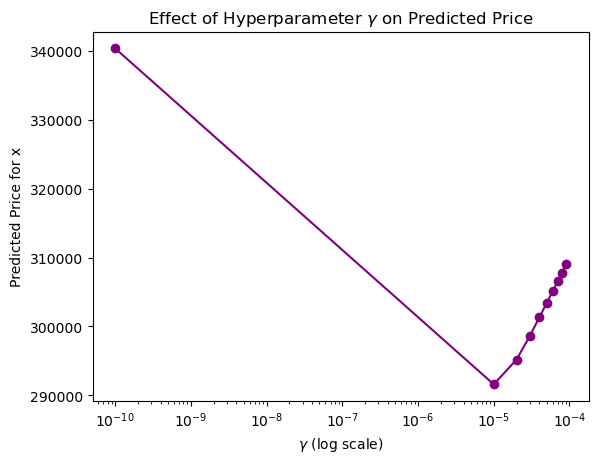

In [8]:
import matplotlib.pylab as plt

""" TODO:
Complete the following code to predict the price of x based on different values of gamma
"""

x = np.array([1650, 3])
gammas_list = np.arange(1e-10, 10e-5, 1e-5)
predictions = []

for gamma in gammas_list:
    prediction = h(x, X, y, gamma) #make a prediction on x using the current gamma ...
    predictions.append(prediction) # append the prediction to the list of predictions

fig, ax = plt.subplots()
# TODO: plot the values the predicted prices of x with respect to the corresponding values of gamma
ax.plot(gammas_list, predictions, marker='o', linestyle='-', color='purple')
ax.set_xscale('log')  # Set x-axis to logarithmic scale for better visualization
ax.set_xlabel(r'$\gamma$ (log scale)')
ax.set_ylabel('Predicted Price for x')
ax.set_title('Effect of Hyperparameter $\gamma$ on Predicted Price')
fig.show()


Finally, we split the training dataset into two parts. The first part `X_train` (and `y_train`) is used as a training data. The second part `X_test` is used to make price predictions and compare it to the true prices `y_test`.

Complete the code to produce a list `y_pred` which contains the predicted price of each house in `X_test`. Then, produce a scatter plot based on `X_test`, `y_pred` and `y_test`, which shows the first feature (house size) on one axis vs. the predicted and true price on the other axis. The plot should look like the Figure below.

Try several values of $\gamma$ (e.g. $0.5, 0.00005, 0.00000001$) and see each time on the plot how your predicted prices change. Notice that when $\gamma$ is smaller, the predicted values tend to be similar regradless of the test houses. Why ? Think about it before looking at the answer below.

*Answer*: When $\gamma$ is set to a very small value, the Gaussian width $\sigma$ is very large. This makes all the values $\{ k(x, x^{(i)}) \mid i=1 \dots n \}$ large (close to 1), i.e., all the training data-points will equaly influence $h(x)$  (the predicted price of $x$). Therefore, the predicted price of any test point $x$ will just be the average price of all training houses.

<img src="imgs/scatterLab2D.png" style="width: 500px;"/>

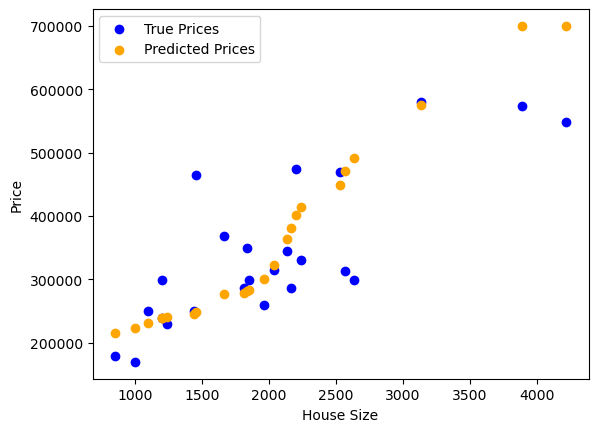

In [11]:
gamma = 0.00005 # 0.5, 0.00005, 0.00000001
n = len(X)

# The training part:
X_train = X[ : n//2] # First half of the dataset
y_train = y[ : n//2] # Outputs corresponding to the first half

# The testing part:
X_test = X[n//2 : ] # Second half of the dataset
y_test = y[n//2 : ] # Outputs corresponding to the second half


""" TODO: 
Based on X_train and y_train, predict the price of each house in X_test. 
These predictions will be in a list named y_pred.
"""
y_pred = [h(xi, X_train, y_train, gamma) for xi in X_test]


""" TODO:
Complete the following code to produce a figure similar to the one shown above.
"""
fig, ax = plt.subplots()
# TODO: scatter plot of the first feature (column 0) of X_test vs. y_test
# TODO: scatter plot of the first feature (column 0) of X_test vs. y_pred

ax.scatter(X_test[:, 0], y_test, label='True Prices', color='blue')
ax.scatter(X_test[:, 0], y_pred, label='Predicted Prices', color='orange')
ax.set_xlabel('House Size')
ax.set_ylabel('Price')
ax.legend()
plt.show()


# Nonlinear regression with scikit-learn (sklearn)
Now you will see an example of nonlinear regression with scikit-learn.

First, let's randomly split our dataset into training and testing parts. The test dataset will later serve as a way to evaluate how well our trained model will perform on new unseen data (when deployed in real-world). Splitting is easy to do in scikit-learn using the `train_test_split` function:

In [12]:
from sklearn.model_selection import train_test_split

# Keep 30% of the data for test (i.e. test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Full data:", X.shape, y.shape)
print("Train data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Full data: (47, 2) (47,)
Train data: (32, 2) (32,)
Test data: (15, 2) (15,)


You can check the following link for more information about the `train_test_split` function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Now let's fit a `StandardScaler` to our data in order to scale it before training (as we did in a previous part of the Lab).

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_normalized = scaler.transform(X_train) # Scale the training data
X_test_normalized = scaler.transform(X_test) # Scale the test data

Now we train a nonlinear regression model called `KernelRidge`, then apply it on our test data, and compute the mean squared error. For more information about `KernelRidge`, check: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

In [15]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

reg = KernelRidge(kernel='rbf', gamma=0.05).fit(X_train_normalized, y_train) # Training
y_pred = reg.predict(X_test_normalized) # Predicting

mse = mean_squared_error(y_test, y_pred) # Same as: ((y_test - y_pred)**2).mean()
print("The MSE on the test data is:", mse)

The MSE on the test data is: 3534364546.531237


In the example above, we used some hyper-parameters chosen manually when training `KernelRidge`. We used a Gaussian kernel (also called *radial basis function* or `rbf`) with `gamma=0.05` set to $0.05$. Later in the course, we will see how to fine-tune the values of such hyper-parameters automatically using *cross validation*. For mor information, you can already check: https://scikit-learn.org/stable/modules/grid_search.html#grid-search

You can also try other nonlinear regression methods that we saw in the lectures, such as the k-nearest-neighbours regression:
- https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor